# Build Our Own Models

This should look familiar... we now are going to use linear regression on some of our own features. I recommend walking through the code below first, then importing your dataset and working through the same problem with your data!



In [4]:
# import libraries 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
import statistics

import warnings
warnings.filterwarnings("ignore")

# Data Loading, Cleaning, and Setup



Read in your data into a pandas dataframe by replacing the `filename` variable with your file's path. You can also use the current code below to work on a mpg dataset, where the target variable we are predicting is **miles per gallon** based on other car features. 

> We should choose two columns that we want to run regresssion on. Use the `.head()` function to decide which columns would be best!



pandas docs - https://pandas.pydata.org/docs/reference/index.html#api <br>
seaborn docs - https://seaborn.pydata.org/api.html

In [5]:
heart = pd.read_csv("./heart.csv")
#TODO: read in your file by replacing the filename variable with your file's path. You can also use this current code to work on an automobile dataset! 

def addNumberCol(dataSetA): #dataSetA represents the heart data set while dataSetB represents the oxstats data set
    
    #Creates a list
    orderedList = []
    for x in range(len(dataSetA)):
        orderedList.append(x)
    print(orderedList)
    # Adds a column to the existing data base and adds the list number to each row.
    dataSetA.insert(0, "Number", orderedList, True)

    return dataSetA

# heart = addNumberCol(heart)
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
heart.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [8]:
#cleaning the data -- dropping missing and duplicate values for sanity
heart.dropna(inplace = True)
heart.drop_duplicates(inplace = True)
heart = heart.reset_index(drop=True)

length = len(heart.index) #save length of array of later

In [9]:
length = len(heart.index) #save length of array of later

<AxesSubplot:>

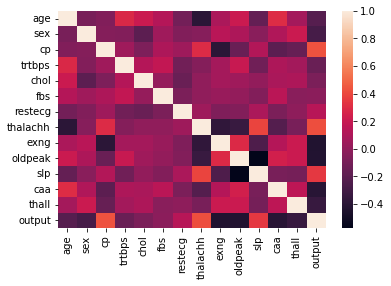

In [10]:
corr_heatmap = sns.heatmap(heart.corr())
corr_heatmap

In [11]:
# plt.savefig('./images/corr_heatmap.png')
fig = corr_heatmap.get_figure()
fig.savefig("./images/corr_heatmap.png")

In [12]:
df = heart.copy() # Data Preparation
df_corr = df.corr() # Generate correlation matrix

import plotly.figure_factory as ff
x = list(df_corr.columns)
y = list(df_corr.index)
z = np.array(df_corr)

fig = ff.create_annotated_heatmap(
    z,
    x = x,
    y = y ,
    annotation_text = np.around(z, decimals=2),
    hoverinfo='z',
    colorscale='Viridis',
    showscale=True,
    )
fig.update_xaxes(side="bottom")
fig.update_layout(
    # title_text='Heatmap', 
    title_x=0.5, 
    width=1000, 
    height=1000,
    yaxis_autorange='reversed',
    template='plotly_white'
)
fig.show()
fig.write_html("./images/corr_heatmap.html")

In [13]:
# import plotly.plotly as py
# import plotly.graph_objs as go

# x0 = 'age'
# x1 = 'sex'
# x2 = 'chol'
# y0 = 'output'

# trace0 = go.Scatter(
#     x=x0,
#     y=y0,
#     mode='markers',
#     marker_dict(color='#835AF1')
# )
# trace1 = go.Scatter(
#     x=x1,
#     y=y0,
#     mode='markers',
#     marker_dict(color='#7FA6EE')
# )
# trace2 = go.Scatter(
#     x=x2,
#     y=y0,
#     mode='markers',
#     marker_dict(color='#B8F7D4')
# )
# data = [trace0, trace1, trace2]

# cluster0 = [dict(type='circle',
#                 xref='x', yref='y',
#            x0=min(x0), y0=min(y0),
#            x1=max(x0), y1=max(y0),
#            opacity=.25,
#            line=dict(color='#835AF1'),
#            fillcolor='#835AF1')]
# cluster1 = [dict(type='circle',
#                 xref='x', yref='y',
#            x0=min(x1), y0=min(y0),
#            x1=max(x1), y1=max(y0),
#            opacity=.25,
#            line=dict(color='#7FA6EE'),
#            fillcolor='#7FA6EE')]
# cluster2 = [dict(type='circle',
#                 xref='x', yref='y',
#            x0=min(x2), y0=min(y0),
#            x1=max(x2), y1=max(y0),
#            opacity=.25,
#            line=dict(color='#B8F7D4'),
#            fillcolor='#B8F7D4')]

# updatemenus = list([
#         dict(buttons=list([
#                     dict(label = 'None',
#                         method = 'relayout',
#                         args = ['shapes', []]),
#                     dict(label ='Cluster 0 - Age',
#                         method = 'relayout',
#                         args = ['shapes', cluster0]),
#                     dict(label ='Cluster 1 - Sex',
#                         method = 'relayout',
#                         args = ['shapes', cluster1]),
#                     dict(label ='Cluster 2 - Cholesterol',
#                         method = 'relayout',
#                         args = ['shapes', cluster2]),
#                     dict(label ='All',
#                         method = 'relayout',
#                         args = ['shapes', cluster0+cluster1+cluster2])
#                 ]),
#             )
#     ])

# layout = dict(title='Factors and Heart Attack Chance', showlegend=False,
#              updatemenus=updatemenus)

# fig2 = dict(data=data, layout=layout)
# py.iplot(fig2, filename='relayout_option_dropdown')

In [18]:
def fixLabels(dataSetA):
    to_replace_sex = ['Female', 'Male']
    replace_with_sex = [0, 1]
    for i in range(len(to_replace_sex)):
        dataSetA["sex"].replace({replace_with_sex[i]: to_replace_sex[i]}, inplace=True)
    return dataSetA
heart_labels= heart.copy()
heart_labels= fixLabels(heart_labels)
heart_labels.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,Male,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,Male,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,Female,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,Male,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,Female,0,120,354,0,1,163,1,0.6,2,0,2,1


In [15]:
fig = px.bar(heart, x='age', y='output',color='age',
                 title= 'Risk of a Heart Attack by Age')

fig.show()
fig.write_html("./images/Risk of a Heart Attack by Age.html")

In [21]:
fig = px.bar(heart_labels, x='sex', y='output',color='sex',
                 title= 'Risk of a Heart Attack by Sex')

fig.show()
fig.write_html("./images/Risk of a Heart Attack by Sex1.html")

### Getting to know the problem

For my data, my columns inlude `'mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', and 'name'`. 

To start, I would like to create a linear regression model that uses horsepower (X) to predict miles per gallon (y) and see how strong our linear regression model is. For your data, you should choose two columns as well to represent X and y.



In [24]:
# X = heart["age", "sex", "cp", "trtbps", ""].to_numpy()
X_pd = heart.drop(columns=['output'])
X = heart.drop(columns=['output']).to_numpy()
y = heart["output"].to_numpy()
# X_np = X.to_numpy()
# y_np = y.to_numpy()
X_pd.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


### Split the data

Our model should ignore 20% of data points to use for testing so it doesn't just memorize the data. We need to make sure there are no missing data points before continuing.



np docs - https://numpy.org/doc/stable/reference/index.html#reference

In [25]:
# Checking for Missing Data
if X.shape[0] != y.shape[0]:
    print("It looks like you have missing data. You may want to preprocess your data more with pandas to delete any rows with missing, NaN, N/A, and null values.")

length = len(heart) #this is the length of the array, idk i kinda copied wat it stated earlier but we can delete this if we dont need it 

idx = np.arange(length) #shuffle our dataset indices so we don't always split the same way!
np.random.shuffle(idx)

#split our data with 80% for training (learning) and 20% for testing.
split_threshold = int(length * 0.8)

train_idx = idx[:split_threshold]
# Uses the remaining indices for testing
test_idx = idx[split_threshold:]


# Generates train and test sets and formats them for training.
x_train, y_train = X[train_idx], y[train_idx]
# print(x_train,y_train)
print(len(x_train),len(y_train))
x_test, y_test = X[test_idx], y[test_idx]
print(len(x_test),len(y_test))

242 242
61 61


### Data Normalization



In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train

array([[-0.78175355,  0.67015058, -0.93419598, ...,  0.96343165,
        -0.71481302, -0.53766384],
       [ 0.10073909,  0.67015058, -0.93419598, ..., -0.65566876,
         0.30876539,  1.10935703],
       [ 0.32136225, -1.49220195, -0.93419598, ...,  0.96343165,
         0.30876539, -0.53766384],
       ...,
       [-0.00957249, -1.49220195,  0.05303296, ...,  0.96343165,
         0.30876539, -0.53766384],
       [ 0.54198541, -1.49220195, -0.93419598, ..., -0.65566876,
        -0.71481302, -0.53766384],
       [-0.23019565,  0.67015058,  2.02749084, ..., -0.65566876,
        -0.71481302,  1.10935703]])

# Model



## KNN

#### Fit a KNN model using a random K

In [27]:
from sklearn.neighbors import KNeighborsClassifier
k = 5
neigh = KNeighborsClassifier(k)
neigh.fit(x_train,y_train)

KNeighborsClassifier()

#### Creating Predictions
Predict outputs on our x_test data that we held out. Think of this as a way to see how the model does on new data!

In [28]:
# Predicting using SKLearn
# y_hat = linr.predict(x_test)
y_hat = neigh.predict(x_test)
print(y_hat)

[0 1 1 1 0 0 1 0 0 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 0 0 0
 0 1 0 1 1 1 1 1 0 1 0 0 1 1 0 1 0 0 0 0 1 1 1 0]


### Results and Evaluation

One way to see if the model is pretty good is the coefficient of determination (R^2) using the `score()` function. You can read about it here: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score.

Another way is to compare our mean absolute error (MAE). MAE measures the prediction error. Mathematically, it is the average absolute difference between observed and predicted outcomes, MAE = mean(abs(observeds - predicteds)). MAE is less sensitive to outliers compared to RMSE.

Read some more about regression model metrics [here](http://www.sthda.com/english/articles/38-regression-model-validation/158-regression-model-accuracy-metrics-r-square-aic-bic-cp-and-more/).



In [29]:
MAE = np.mean(abs(y_test - y_hat))
MAE

0.19672131147540983

In [30]:
# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import recall_score,precision_score,f1_score
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_hat))
print("recall on test set:", recall_score(y_test, y_hat, pos_label=1))
print("precision on test set:", precision_score(y_test, y_hat, pos_label=1))
print("F1-score on test set:", f1_score(y_test, y_hat, pos_label=1))

Accuracy: 0.8032786885245902
recall on test set: 0.8709677419354839
precision on test set: 0.7714285714285715
F1-score on test set: 0.8181818181818182


## KNN and SVM models with confusion matrix



0.819672131147541


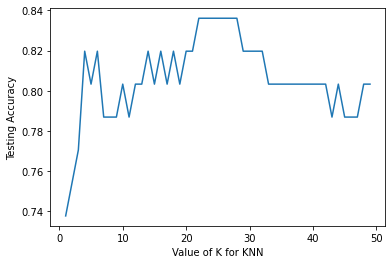

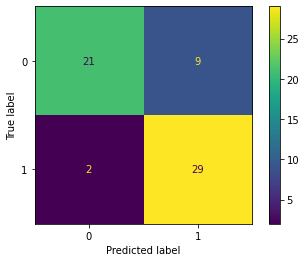

In [49]:
# For KNN instead of using Grid Search Humza used a for-loop to find the optimal n_neighbors value
# Point out the importance of recall




%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

k_range = range(1, 50)
scores = {}
scoresList = []
for kNum in k_range:
    knn = KNeighborsClassifier(n_neighbors = kNum)
    knn.fit(x_train, y_train)
    y_predict = knn.predict(x_test)
    scores[kNum] = metrics.accuracy_score(y_test, y_predict)
    scoresList.append(metrics.accuracy_score(y_test, y_predict))

plt.plot(k_range, scoresList)
plt.xlabel("Value of K for KNN")
plt.ylabel("Testing Accuracy")

# Best n_neighbors is 35

knn = KNeighborsClassifier(n_neighbors = 20)
knn.fit(x_train, y_train)
y_predict = knn.predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_predict)
print(accuracy)

plot_confusion_matrix(knn, x_test, y_test)
plt.grid(False)

# fig.write_html('')
plt.savefig('./images/confusion_matrix_1.png')

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.878 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.878 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.812 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.812 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.979 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.551 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.551 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.562 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.562 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.542 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.878 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear

[CV 2/5] END .......C=1, gamma=1, kernel=linear;, score=0.878 total time=   0.0s
[CV 3/5] END .......C=1, gamma=1, kernel=linear;, score=0.833 total time=   0.0s
[CV 4/5] END .......C=1, gamma=1, kernel=linear;, score=0.833 total time=   0.0s
[CV 5/5] END .......C=1, gamma=1, kernel=linear;, score=0.938 total time=   0.0s
[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.571 total time=   0.0s
[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.612 total time=   0.0s
[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.583 total time=   0.0s
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.583 total time=   0.0s
[CV 1/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.878 total time=   0.0s
[CV 2/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.878 total time=   0.0s
[CV 3/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.833 total time=   0.0s
[CV 4/5] END .....C=1, gamma

[CV 2/5] END ......C=10, gamma=1, kernel=linear;, score=0.878 total time=   0.0s
[CV 3/5] END ......C=10, gamma=1, kernel=linear;, score=0.750 total time=   0.0s
[CV 4/5] END ......C=10, gamma=1, kernel=linear;, score=0.833 total time=   0.0s
[CV 5/5] END ......C=10, gamma=1, kernel=linear;, score=0.938 total time=   0.0s
[CV 1/5] END .........C=10, gamma=1, kernel=rbf;, score=0.571 total time=   0.0s
[CV 2/5] END .........C=10, gamma=1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 3/5] END .........C=10, gamma=1, kernel=rbf;, score=0.646 total time=   0.0s
[CV 4/5] END .........C=10, gamma=1, kernel=rbf;, score=0.604 total time=   0.0s
[CV 5/5] END .........C=10, gamma=1, kernel=rbf;, score=0.604 total time=   0.0s
[CV 1/5] END ....C=10, gamma=0.1, kernel=linear;, score=0.878 total time=   0.0s
[CV 2/5] END ....C=10, gamma=0.1, kernel=linear;, score=0.878 total time=   0.0s
[CV 3/5] END ....C=10, gamma=0.1, kernel=linear;, score=0.750 total time=   0.0s
[CV 4/5] END ....C=10, gamma

[CV 1/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.816 total time=   0.0s
[CV 2/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.857 total time=   0.0s
[CV 3/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.792 total time=   0.0s
[CV 4/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.771 total time=   0.0s
[CV 5/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.854 total time=   0.0s
[CV 1/5] END ...C=10, gamma=0.01, kernel=linear;, score=0.878 total time=   0.0s
[CV 2/5] END ...C=10, gamma=0.01, kernel=linear;, score=0.878 total time=   0.0s
[CV 3/5] END ...C=10, gamma=0.01, kernel=linear;, score=0.750 total time=   0.0s
[CV 4/5] END ...C=10, gamma=0.01, kernel=linear;, score=0.833 total time=   0.0s
[CV 5/5] END ...C=10, gamma=0.01, kernel=linear;, score=0.938 total time=   0.0s
[CV 1/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.857 total time=   0.0s
[CV 2/5] END ......C=10, gamma=0.01, kernel=rbf;, score=0.878 total time=   0.0s
[CV 3/5] END ......C=10, gam

[CV 5/5] END ..C=10, gamma=0.001, kernel=linear;, score=0.938 total time=   0.1s
[CV 1/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.878 total time=   0.0s
[CV 2/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.837 total time=   0.0s
[CV 3/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.792 total time=   0.0s
[CV 4/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.812 total time=   0.0s
[CV 5/5] END .....C=10, gamma=0.001, kernel=rbf;, score=0.917 total time=   0.0s
[CV 1/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.878 total time=   0.0s
[CV 2/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.878 total time=   0.0s
[CV 3/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.750 total time=   0.0s
[CV 4/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.833 total time=   0.0s
[CV 5/5] END .C=10, gamma=0.0001, kernel=linear;, score=0.938 total time=   0.0s
[CV 1/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.857 total time=   0.0s
[CV 2/5] END ....C=10, gamma

[CV 1/5] END .....C=100, gamma=1, kernel=linear;, score=0.878 total time=   0.1s
[CV 2/5] END .....C=100, gamma=1, kernel=linear;, score=0.878 total time=   0.1s


[CV 3/5] END .....C=100, gamma=1, kernel=linear;, score=0.750 total time=   0.2s
[CV 4/5] END .....C=100, gamma=1, kernel=linear;, score=0.833 total time=   0.1s


[CV 5/5] END .....C=100, gamma=1, kernel=linear;, score=0.938 total time=   0.3s
[CV 1/5] END ........C=100, gamma=1, kernel=rbf;, score=0.571 total time=   0.0s
[CV 2/5] END ........C=100, gamma=1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 3/5] END ........C=100, gamma=1, kernel=rbf;, score=0.646 total time=   0.0s
[CV 4/5] END ........C=100, gamma=1, kernel=rbf;, score=0.604 total time=   0.0s
[CV 5/5] END ........C=100, gamma=1, kernel=rbf;, score=0.604 total time=   0.0s
[CV 1/5] END ...C=100, gamma=0.1, kernel=linear;, score=0.878 total time=   0.1s


[CV 2/5] END ...C=100, gamma=0.1, kernel=linear;, score=0.878 total time=   0.1s
[CV 3/5] END ...C=100, gamma=0.1, kernel=linear;, score=0.750 total time=   0.1s


[CV 4/5] END ...C=100, gamma=0.1, kernel=linear;, score=0.833 total time=   0.1s


[CV 5/5] END ...C=100, gamma=0.1, kernel=linear;, score=0.938 total time=   0.3s
[CV 1/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.816 total time=   0.0s
[CV 2/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.857 total time=   0.0s
[CV 3/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.771 total time=   0.0s
[CV 4/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.812 total time=   0.0s
[CV 5/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.833 total time=   0.0s
[CV 1/5] END ..C=100, gamma=0.01, kernel=linear;, score=0.878 total time=   0.1s


[CV 2/5] END ..C=100, gamma=0.01, kernel=linear;, score=0.878 total time=   0.1s
[CV 3/5] END ..C=100, gamma=0.01, kernel=linear;, score=0.750 total time=   0.1s


[CV 4/5] END ..C=100, gamma=0.01, kernel=linear;, score=0.833 total time=   0.1s


[CV 5/5] END ..C=100, gamma=0.01, kernel=linear;, score=0.938 total time=   0.4s
[CV 1/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.857 total time=   0.0s
[CV 2/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.857 total time=   0.0s
[CV 3/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.792 total time=   0.0s
[CV 4/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.750 total time=   0.0s
[CV 5/5] END .....C=100, gamma=0.01, kernel=rbf;, score=0.917 total time=   0.0s
[CV 1/5] END .C=100, gamma=0.001, kernel=linear;, score=0.878 total time=   0.1s


[CV 2/5] END .C=100, gamma=0.001, kernel=linear;, score=0.878 total time=   0.1s
[CV 3/5] END .C=100, gamma=0.001, kernel=linear;, score=0.750 total time=   0.1s


[CV 4/5] END .C=100, gamma=0.001, kernel=linear;, score=0.833 total time=   0.1s


[CV 5/5] END .C=100, gamma=0.001, kernel=linear;, score=0.938 total time=   0.3s
[CV 1/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.878 total time=   0.0s
[CV 2/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.878 total time=   0.0s
[CV 3/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.833 total time=   0.0s
[CV 4/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.812 total time=   0.0s
[CV 5/5] END ....C=100, gamma=0.001, kernel=rbf;, score=0.958 total time=   0.0s
[CV 1/5] END C=100, gamma=0.0001, kernel=linear;, score=0.878 total time=   0.1s


[CV 2/5] END C=100, gamma=0.0001, kernel=linear;, score=0.878 total time=   0.1s
[CV 3/5] END C=100, gamma=0.0001, kernel=linear;, score=0.750 total time=   0.1s


[CV 4/5] END C=100, gamma=0.0001, kernel=linear;, score=0.833 total time=   0.1s


[CV 5/5] END C=100, gamma=0.0001, kernel=linear;, score=0.938 total time=   0.3s
[CV 1/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.878 total time=   0.0s
[CV 2/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.837 total time=   0.0s
[CV 3/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.792 total time=   0.0s
[CV 4/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.812 total time=   0.0s
[CV 5/5] END ...C=100, gamma=0.0001, kernel=rbf;, score=0.917 total time=   0.0s


[CV 1/5] END ....C=1000, gamma=1, kernel=linear;, score=0.878 total time=   1.1s


[CV 2/5] END ....C=1000, gamma=1, kernel=linear;, score=0.878 total time=   1.3s


[CV 3/5] END ....C=1000, gamma=1, kernel=linear;, score=0.750 total time=   1.7s


[CV 4/5] END ....C=1000, gamma=1, kernel=linear;, score=0.833 total time=   1.4s


[CV 5/5] END ....C=1000, gamma=1, kernel=linear;, score=0.938 total time=   2.5s
[CV 1/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.571 total time=   0.0s
[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.646 total time=   0.0s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.604 total time=   0.0s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.604 total time=   0.0s


[CV 1/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.878 total time=   1.3s


[CV 2/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.878 total time=   1.5s


[CV 3/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.750 total time=   1.5s


[CV 4/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.833 total time=   1.5s


[CV 5/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.938 total time=   2.3s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.816 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.857 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.771 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.812 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.833 total time=   0.0s


[CV 1/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.878 total time=   1.3s


[CV 2/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.878 total time=   1.5s


[CV 3/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.750 total time=   1.7s


[CV 4/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.833 total time=   1.8s


[CV 5/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.938 total time=   2.8s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.735 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.857 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.688 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.688 total time=   0.0s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.812 total time=   0.0s


[CV 1/5] END C=1000, gamma=0.001, kernel=linear;, score=0.878 total time=   1.2s


[CV 2/5] END C=1000, gamma=0.001, kernel=linear;, score=0.878 total time=   1.4s


[CV 3/5] END C=1000, gamma=0.001, kernel=linear;, score=0.750 total time=   2.5s


[CV 4/5] END C=1000, gamma=0.001, kernel=linear;, score=0.833 total time=   2.0s


[CV 5/5] END C=1000, gamma=0.001, kernel=linear;, score=0.938 total time=   3.3s
[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.857 total time=   0.0s
[CV 2/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.857 total time=   0.0s
[CV 3/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.792 total time=   0.0s
[CV 4/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.833 total time=   0.0s
[CV 5/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.917 total time=   0.0s


[CV 1/5] END C=1000, gamma=0.0001, kernel=linear;, score=0.878 total time=   1.2s


[CV 2/5] END C=1000, gamma=0.0001, kernel=linear;, score=0.878 total time=   1.4s


[CV 3/5] END C=1000, gamma=0.0001, kernel=linear;, score=0.750 total time=   1.8s


[CV 4/5] END C=1000, gamma=0.0001, kernel=linear;, score=0.833 total time=   1.7s


[CV 5/5] END C=1000, gamma=0.0001, kernel=linear;, score=0.938 total time=   3.1s
[CV 1/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.878 total time=   0.0s
[CV 2/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.878 total time=   0.0s
[CV 3/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.833 total time=   0.0s
[CV 4/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.812 total time=   0.0s
[CV 5/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.958 total time=   0.0s
{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
SVC(C=0.1, gamma=1, kernel='linear')


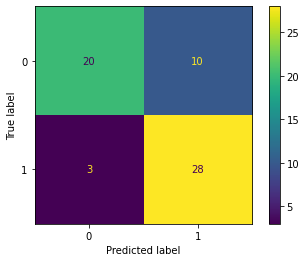

In [32]:
#I'm just trying out gridsearch for svm here - Humza 

#Although we never decided on doing SVM here it is!

from sklearn import svm
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV



param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear', 'rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 5)



grid.fit(x_train, y_train)

print(grid.best_params_)
print(grid.best_estimator_)


# C=0.1, gamma=1, kernel=linear;, score=0.917
# C=1000, gamma=0.1, kernel=linear

clf = svm.SVC(C=1, gamma=0.01)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)


# print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# print("Recall:", 30/3)


plot_confusion_matrix(clf, x_test, y_test)
plt.grid(False)

## Random Forests

### Humza's Code for Random Forests Model

Random Forests
Highest Accuracy:  0.819672131147541 


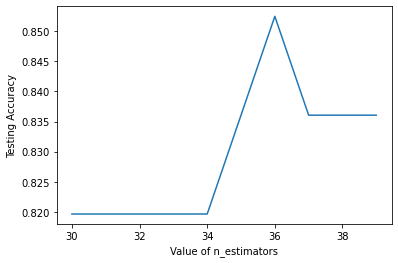

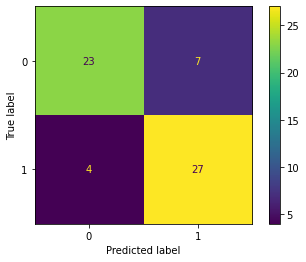

In [33]:
#Code for Random Forests is below
#The most accurate random forest has a n_estimators value of 35 and a random_state value of 23

# Humza used a for-loop to find the optimal value of n_estimators and random_state
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

nEstRange = range(30, 40) # range of n_estimator values
scoresF = {}
scoresListF = []

for nEst in nEstRange:
    forest = RandomForestClassifier(n_estimators=nEst, random_state=38)
    forest.fit(x_train,y_train)
    predictions = forest.predict(x_test)
    scoresF[nEst] = metrics.accuracy_score(y_test, predictions)
    scoresListF.append(metrics.accuracy_score(y_test, predictions))

print('Random Forests')
plt.plot(nEstRange, scoresListF) 
plt.xlabel("Value of n_estimators")
plt.ylabel("Testing Accuracy")

forest = RandomForestClassifier(n_estimators=33, random_state=38)
forest.fit(x_train,y_train)
predictions = forest.predict(x_test)
accuracy = metrics.accuracy_score(y_test, predictions)
print('Highest Accuracy: ', accuracy, '')


plot_confusion_matrix(forest, x_test, y_test)
plt.grid(False)

### Code for GridSearchCV Model

gridsearchcv model differs from kfold cv where it helps tune hyperparameters.

basically:  
these lines of code determine   
the best hyperparameters to use for the cross\-validation. the results  
will tell us the specific numbers to use so we get the best accuracy


In [34]:
# random forest model code [gridsearchcv]
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfc = RandomForestClassifier(random_state=1)

param_grid = {
    'n_estimators': [100, 400],
    'max_features': ['sqrt'],
    'max_depth': [5,6,7,8],
    'criterion': ['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)
CV_rfc.fit(x_train, y_train)

print('The best hyperparameters to use are:','\n',CV_rfc.best_params_)

The best hyperparameters to use are: 
 {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 100}


### Continuation of GridSearchCV

using the best hyperparameters we generated above this line, these next few  
 lines of code will provide accuracy numbers for the Random Forests model

In [35]:
# cont gridsearchcv code
rfc1 = RandomForestClassifier(random_state=1, max_features='sqrt', n_estimators=100, max_depth=5, criterion='gini')
# at n estimators=100 and max depths=5, the highest acc we can get is 90%
# more estimators (~200-400) do bring the accuracy down by a few percentages but does not seem to go below 80%

rfc1.fit(x_train, y_train)
pred=rfc1.predict(x_test)

print('Accuracy for Random Forest on CV Data:', accuracy_score(y_test,pred))

Accuracy for Random Forest on CV Data: 0.8032786885245902


### Code for K\-Fold Cross Validation Model

this type of model creates different training and testing sets and uses them to make various decision trees  

small notes: n estimators = \# of trees built b4 predictions r made

n features = help tune model, directly impacts model training speed

random state = helps w easier replication of solution


In [36]:
# random forest model code [KFOLD CV]
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

X, y = make_classification(n_samples=200, n_features=20, n_informative=15, n_redundant=5, random_state=3)

model = RandomForestClassifier(n_estimators=200)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.823 (0.106)


## **Confusion Matrix Code**

[[22  8]
 [ 4 27]]


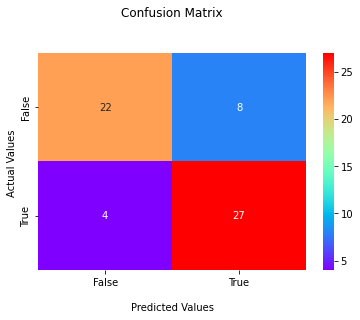

In [50]:
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_test, pred)
print(confmat)

import seaborn as sns

ax = sns.heatmap(confmat, annot=True, cmap='rainbow')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

fig.savefig("./images/random_forest_confusion_matrix.png")

## Gradient Boosting Classifier

#### Fit a model using a random set of hyper-parameters

In [38]:
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0).fit(x_train, y_train)

#### Creating Predictions
Predict outputs on our x_test data that we held out. Think of this as a way to see how the model does on new data!

In [39]:
y_hat = clf.predict(x_test)
print(y_hat)

[0 1 1 1 0 1 1 0 0 0 1 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 0 0 0
 0 1 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0]


#### Results and Evaluation

In [40]:
MAE = np.mean(abs(y_test - y_hat))
MAE

0.16393442622950818

In [41]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_hat))
print("recall on test set:", recall_score(y_test, y_hat, pos_label=1))
print("precision on test set:", precision_score(y_test, y_hat, pos_label=1))
print("F1-score on test set:", f1_score(y_test, y_hat, pos_label=1))

Accuracy: 0.8360655737704918
recall on test set: 0.9032258064516129
precision on test set: 0.8
F1-score on test set: 0.8484848484848486


### Hyper\-parameters Tuning

#### Tune one hyper-parameter manully

Text(0, 0.5, 'Testing Accuracy')

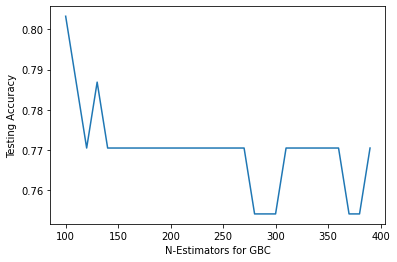

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier

n_range = range(100, 400, 10)
scores = {}
scoresList = []
for nNum in n_range:
    clf = GradientBoostingClassifier(n_estimators=nNum,
                                     learning_rate=1.0,
                                     max_depth=1,
                                     random_state=0).fit(x_train, y_train)
    y_predict = clf.predict(x_test)
    scores[nNum] = metrics.accuracy_score(y_test, y_predict)
    scoresList.append(metrics.accuracy_score(y_test, y_predict))

plt.plot(n_range, scoresList)
plt.xlabel("N-Estimators for GBC")
plt.ylabel("Testing Accuracy")

#### Tune all hyper parameters using GridSearchCV

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

clf = GradientBoostingClassifier(random_state=0)
param_grid = {
    'n_estimators': [100, 200, 300,400],
    'learning_rate': [0.01,0.1, 1],
    'max_depth': [5,7,9]
}
CV_clf = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)
CV_clf.fit(x_train, y_train)

print('\n',CV_clf.best_params_)


 {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300}


### Create a new model using the best hyper\-parameters

In [44]:
import matplotlib.pyplot as plt

clf = GradientBoostingClassifier(n_estimators=CV_clf.best_params_['n_estimators'], \
                                 learning_rate=CV_clf.best_params_['learning_rate'], \
                                 max_depth=CV_clf.best_params_['max_depth'], \
                                 random_state=0)

clf.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=5, n_estimators=300,
                           random_state=0)

#### Evaluate the best model

In [45]:
from sklearn import metrics
from sklearn.metrics import recall_score,precision_score,f1_score
y_hat = clf.predict(x_test)
# print(y_hat)
print("Accuracy:",metrics.accuracy_score(y_test, y_hat))

print("recall on test set:", recall_score(y_test, y_hat, pos_label=1))
print("precision on test set:", precision_score(y_test, y_hat, pos_label=1))
print("F1-score on test set:", f1_score(y_test, y_hat, pos_label=1))

Accuracy: 0.8032786885245902
recall on test set: 0.8064516129032258
precision on test set: 0.8064516129032258
F1-score on test set: 0.8064516129032258


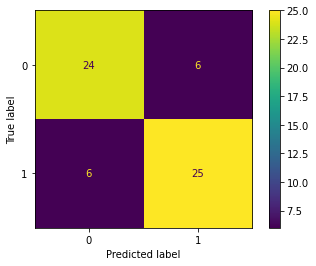

In [46]:
from sklearn.metrics import plot_confusion_matrix
# pipe_clf = GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_depth=5, random_state=0).fit(x_train, y_train)
plot_confusion_matrix(clf, x_test, y_test)
plt.grid(False)

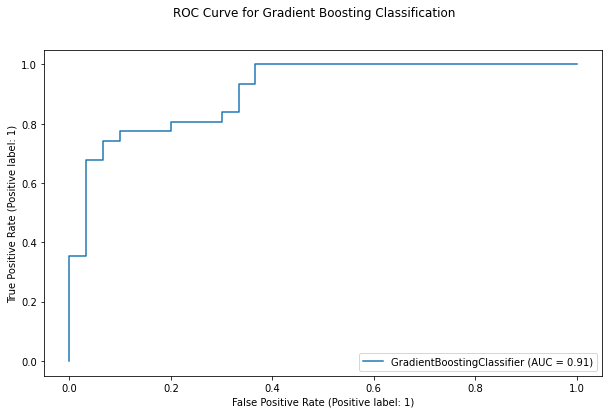

In [47]:
from sklearn.metrics import roc_curve, RocCurveDisplay, plot_roc_curve, auc
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
fig.suptitle('ROC Curve for Gradient Boosting Classification')
plot_roc_curve(clf, x_test, y_test, ax=axes)
plt.show()

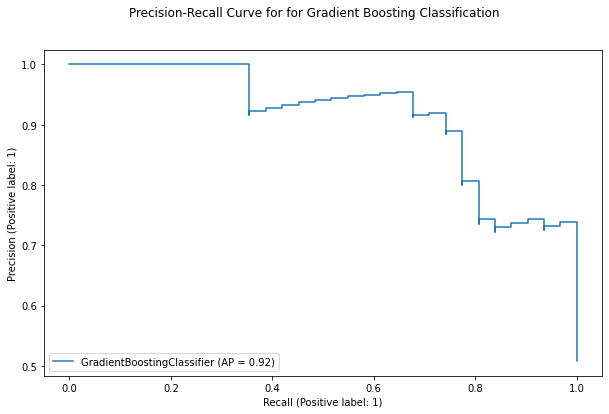

In [48]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
fig.suptitle('Precision-Recall Curve for for Gradient Boosting Classification')
plot_precision_recall_curve(clf, x_test, y_test, ax=axes)
plt.show()